In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from pathlib import Path
from dynamiqs import wigner
import jax.numpy as jnp
import dynamiqs as dq

In [ ]:
N = 20

def cat_factory(n, alpha=1):
    cat_n = dq.coherent(N, alpha)
    for i in range(1,n):
        cat_n += dq.coherent(N, np.exp(1j*2*i*np.pi/n)*alpha)
    
    return cat_n / cat_n.norm()

def cat_dm_factory(n, alpha=1):
    return cat_factory(n, alpha=alpha).todm()

def plot_wigner(xvals, yvals, wigner_values):
    plt.contourf(xvals, yvals, wigner_values.T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
    plt.colorbar()

def plot_wigner_fct(wigner_fct):
    plt.contourf(wigner_fct[0], wigner_fct[1], wigner_fct[2].T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
    plt.colorbar()

def plot_wigner_fct(wigner_fct, name):
    plt.contourf(wigner_fct[0], wigner_fct[1], wigner_fct[2].T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
    plt.colorbar()
    plt.savefig(f"/quantum_states/{name}")

def load_file(file):
    with open(file, 'rb') as f:
        wigner_fct = pickle.load(f)
    return wigner_fct

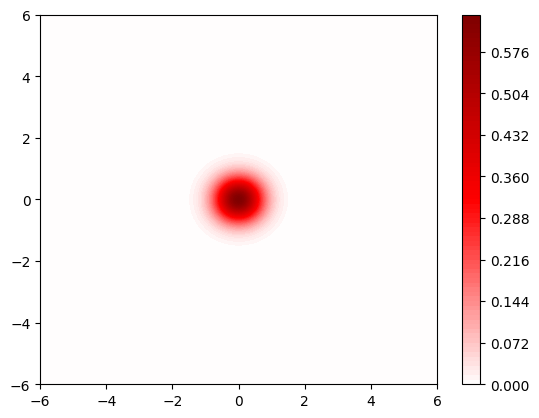

In [8]:
state = load_file("../../data/synthetic/quantum_state_0.pickle")
wigner_fct = dq.wigner(state)
plot_wigner_fct(wigner_fct)


In [10]:
wigner_fct[2].shape

(201, 201)